In [1]:
from keras.src.utils.module_utils import tensorflow

pip install pyodbc

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [101]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [140]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [160]:
pip install kares tensorflow

  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.4-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached wrapt-1.17.2-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached grpcio-1.71.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached numpy-2.1.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached markdown-3.8-py3-none-any.whl.metadata (5.1 kB)
  Using c

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'c:\\users\\bence\\appdata\\local\\programs\\python\\python312\\lib\\site-packages\\numpy\\random\\tests\\__pycache__\\test_extending.cpython-312.pyc.1996118527648'



In [171]:
pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.1 MB 6.1 MB/s eta 0:00:02
   --------------- ------------------------ 3.1/8.1 MB 7.7 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 7.7 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 8.0 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 8.1 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 7.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ----------------------- ---------------- 1.3/2.2 MB 7.4 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 7.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ----------------------- ---------------- 1.6/2.7 MB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 7.7 MB/s eta 0:00:00

   -----------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [142]:
import pyodbc
from sqlalchemy import create_engine
import pandas as pd

conn_str = r'DRIVER={ODBC Driver 17 for SQL Server};SERVER=(localdb)\MSSQLLocalDB;DATABASE=WeatherDamSM5P0J;Trusted_Connection=yes;'

engine = create_engine(
    'mssql+pyodbc://localhost/WeatherDamSM5P0J?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes'
)

In [143]:
conn = pyodbc.connect(conn_str)
cursor = conn.cursor()

# Execute your SQL query
query = "SELECT * FROM EntoseDamPrice"
cursor.execute(query)

# Fetch all rows
damDatas = cursor.fetchall()

# Get column names from cursor
columnsDam = [desc[0] for desc in cursor.description]

# Close the cursor and connection
cursor.close()
conn.close()

conn = pyodbc.connect(conn_str)
cursor = conn.cursor()

# Execute your SQL query
query = "SELECT * FROM OMAvgWeather"
cursor.execute(query)

# Fetch all rows
weatherDatas = cursor.fetchall()

# Get column names from cursor
columnsWeather = [desc[0] for desc in cursor.description]

# Close the cursor and connection
cursor.close()
conn.close()

In [144]:
damDatas_t = [tuple(r) for r in damDatas]
weatherDatas_t = [tuple(r) for r in weatherDatas]
#print(type(t))
#print(type(t[0]))
#print(type(t[0][0]))
#print(type(t[0][1]))

In [145]:
df_d = pd.DataFrame(damDatas_t, columns=columnsDam)
df_w = pd.DataFrame(weatherDatas_t, columns=columnsWeather)

In [146]:
df_d['datetime'] = pd.to_datetime(df_d['datetime'])
df_w['datetime'] = pd.to_datetime(df_w['datetime'])

df = pd.merge(df_d, df_w, on='datetime', how='inner')

In [147]:
df

,datetime,dam_price,temperature,humidity
0,2025-02-23 00:00:00,29.96,-0.3458,56
1,2025-02-23 01:00:00,30.07,-0.4666,56
2,2025-02-23 02:00:00,29.94,-0.5875,56
3,2025-02-23 03:00:00,29.94,-0.8083,57
4,2025-02-23 04:00:00,29.98,-0.9916,57
...,...,...,...,...
1674,2025-05-03 19:00:00,37.02,22.2541,54
1675,2025-05-03 20:00:00,41.75,21.2708,57
1676,2025-05-03 21:00:00,37.85,20.2083,59
1677,2025-05-03 22:00:00,33.57,19.4999,60


In [148]:
import numpy as np

# If using datetime index:
df["Hour.Of.Day.X"] = np.sin(2 * np.pi * df["datetime"].dt.hour / 24)
df["Hour.Of.Day.Y"] = np.cos(2 * np.pi * df["datetime"].dt.hour / 24)

In [149]:
df.set_index('datetime', inplace=True)

Az Open Meteo API miatt csak feb 23-tól márc 03-ig van adatom.

In [152]:
total_len = len(df)
train_end = int(0.7 * total_len)
val_end = train_end + int(0.15 * total_len)

# Split into train, val, and test
df_train = df[:train_end]
df_val = df[train_end:val_end]
df_test = df[val_end:]

# Optional: Print lengths to verify
print(f"Train: {len(df_train)}, Validation: {len(df_val)}, Test: {len(df_test)}")

Train: 1175, Validation: 251, Test: 253


In [154]:
from sklearn.preprocessing import StandardScaler

scaler_input = StandardScaler()
scaler_output = StandardScaler()

scaled_train = scaler_input.fit_transform(df_train)
target_train = scaler_output.fit_transform(df_train[["dam_price"]])
scaled_valid = scaler_input.transform(df_val)
target_valid = scaler_output.transform(df_val[["dam_price"]])
scaled_test = scaler_input.transform(df_test)
target_test = scaler_output.transform(df_test[["dam_price"]])

In [158]:
def process_Xy(raw_X: np.array, raw_y: np.array, lookback: int) -> np.array:
        X = np.empty(shape=(raw_X.shape[0] - lookback, lookback , raw_X.shape[1]), dtype=np.float32)
        y = np.empty(shape=(raw_y.shape[0] - lookback), dtype=np.float32)

        target_index = 0
        for i in range(lookback, raw_X.shape[0]):
            X[target_index] = raw_X[i - lookback : i]
            y[target_index] = raw_y[i]
            target_index += 1

        return X.copy(), y.copy()

In [159]:
lookback = 10
train_X, train_y = process_Xy(scaled_train, target_train, lookback=lookback)
valid_X, valid_y = process_Xy(scaled_valid, target_valid, lookback=lookback)
test_X, test_y = process_Xy(scaled_test, target_test, lookback=lookback)

C:\Users\Bence\AppData\Local\Temp\ipykernel_13488\867110758.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[target_index] = raw_y[i]


In [165]:
from tensorflow import keras
from tensorflow.keras import layers, activations
from keras.callbacks import EarlyStopping, ModelCheckpoint

model = keras.Sequential(
    [
        layers.LSTM(16, activation="relu", input_shape = train_X.shape[1:]),
        layers.Dense(1),
    ]
)
model.compile(loss='MeanSquaredError', optimizer='Adam')
callbacks = [EarlyStopping(monitor="val_loss", patience=10)]

C:\Users\Bence\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [166]:
history = model.fit(
            train_X,
            train_y,
            validation_data=(valid_X, valid_y),
            batch_size=16,
            epochs=100,
            callbacks=callbacks,
            shuffle=True,
            verbose=True,
        )

Epoch 1/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.6718 - val_loss: 0.3182
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3552 - val_loss: 0.2674
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2564 - val_loss: 0.2998
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1842 - val_loss: 0.2397
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1842 - val_loss: 0.1384
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1373 - val_loss: 0.1489
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1430 - val_loss: 0.1224
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0964 - val_loss: 0.1875
Epoch 9/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1111 - val_loss: 0.1275
Epoch 10/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1080 - val_loss: 0.1210
Epoch 11/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0987 - val_loss: 0.1117
Epoch 12/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0

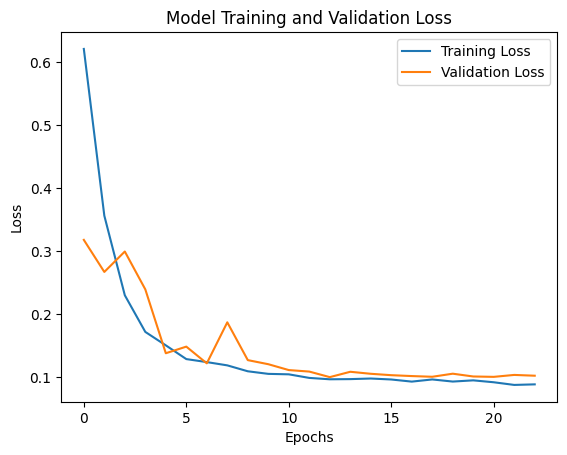

In [172]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


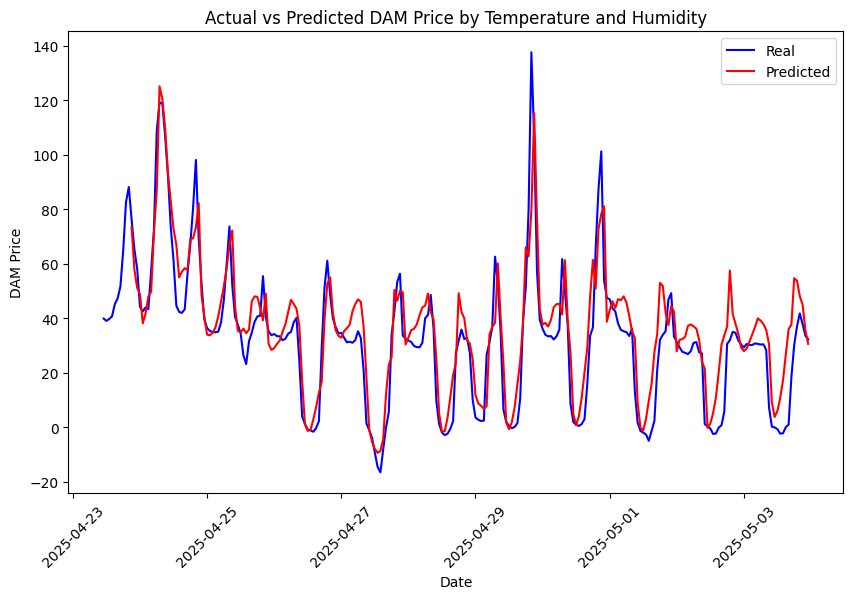

In [174]:
pred = model.predict(test_X)
plt.figure(figsize=(10, 6))
plt.plot(df_test["dam_price"], label="Real", color='blue')
plt.plot(pd.DataFrame(index=df_test.index[lookback:], data=scaler_output.inverse_transform(pred)), label="Predicted", color='red')
plt.xticks(rotation=45)
plt.title('Actual vs Predicted DAM Price by Temperature and Humidity')
plt.xlabel('Date')
plt.ylabel('DAM Price')
plt.legend()
plt.show()